# **Liberaries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import cross_val_predict
import random
from sklearn.metrics import precision_score ,recall_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.utils import resample
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import PolynomialFeatures
import scipy.stats as stats
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve



# **Read dataset**

In [ ]:
data=pd.read_csv("//content/water_potability.csv")

# **1. Data Understanding & Exploration**

In [ ]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
data.shape

(3276, 10)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [ ]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690300,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833605,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762125,8.114887,359.950170,481.792305,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


<ipython-input-8-63fb3018418c>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  var.hist(ax=ax)


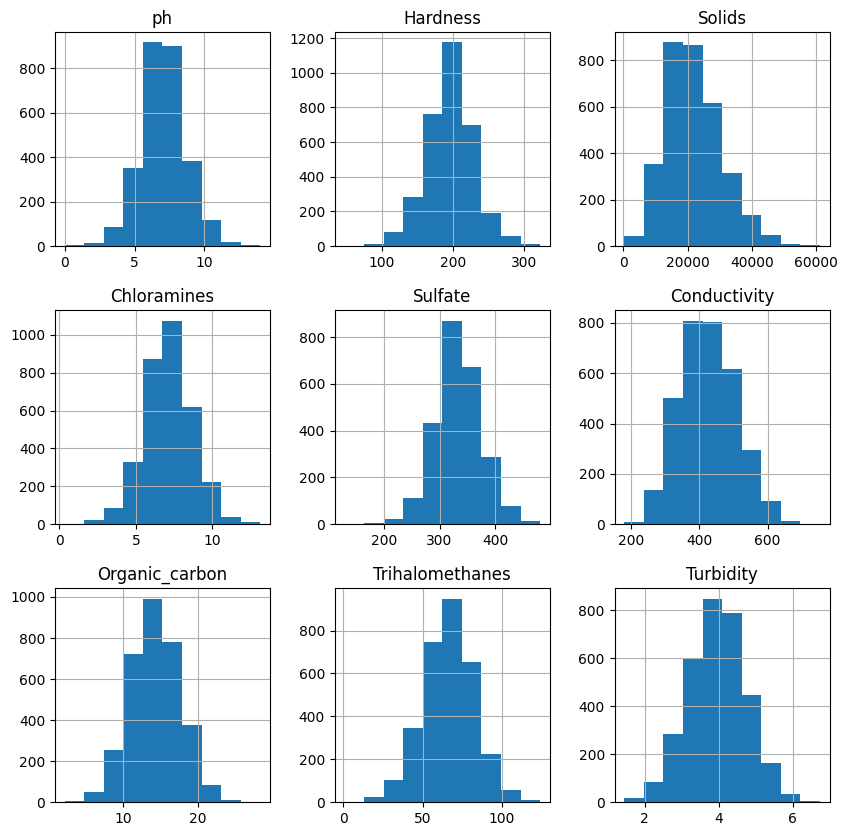

In [ ]:
fig = plt.figure(figsize = (10,10))
var = data.drop("Potability", axis=1)
ax = fig.gca()
var.hist(ax=ax)
plt.show();

In [ ]:
class_counts = data['Potability'].value_counts()
class_proportions = class_counts / len(data)

print(class_counts)
print(class_proportions)

Potability
0    1998
1    1278
Name: count, dtype: int64
Potability
0    0.60989
1    0.39011
Name: count, dtype: float64


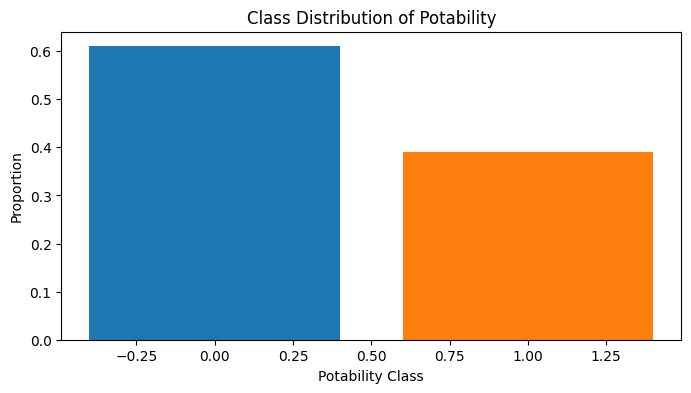

In [ ]:
class_counts = data['Potability'].value_counts()
class_proportions = class_counts / len(data)

plt.figure(figsize=(8, 4))

colors = ['#1f77b4', '#ff7f0e']

plt.bar(class_proportions.index, class_proportions.values, color=colors)
plt.xlabel('Potability Class')
plt.ylabel('Proportion')
plt.title('Class Distribution of Potability')
plt.show()

In [ ]:
summary_stats = data.describe()
print(summary_stats)

                ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690300     6.127421   307.699498   
50%       7.036752   196.967627  20927.833605     7.130299   333.073546   
75%       8.062066   216.667456  27332.762125     8.114887   359.950170   
max      14.000000   323.124000  61227.196010    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  


In [ ]:
# Calculate the correlation between each feature and 'Potability'
correlations = data.corr()['Potability'].sort_values(ascending=False)

# Display correlations
print(correlations)

Potability         1.000000
Solids             0.033743
Chloramines        0.023779
Trihalomethanes    0.007130
Turbidity          0.001581
ph                -0.003556
Conductivity      -0.008128
Hardness          -0.013837
Sulfate           -0.023577
Organic_carbon    -0.030001
Name: Potability, dtype: float64


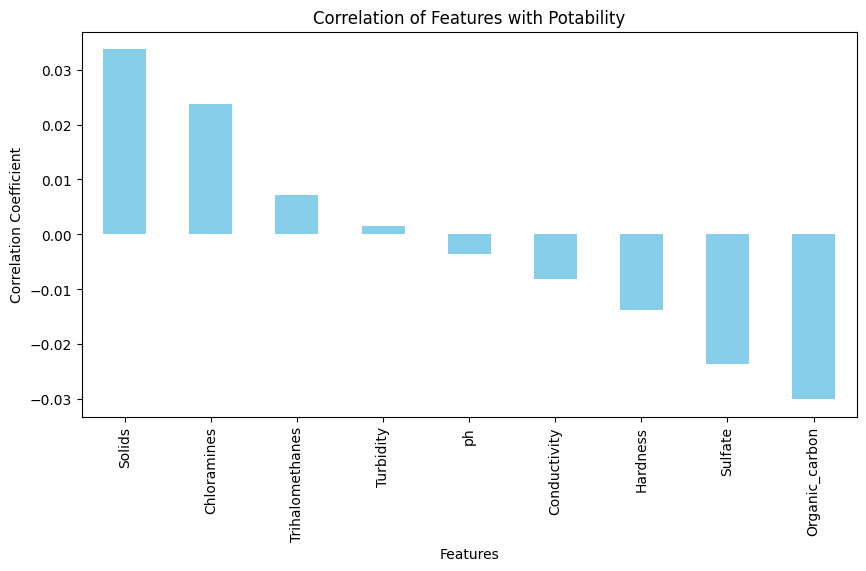

In [ ]:
# Bar plot for correlations with the target variable
plt.figure(figsize=(10, 5))
correlations[1:].plot(kind='bar', color='skyblue')  # Exclude the target itself
plt.title('Correlation of Features with Potability')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.show()

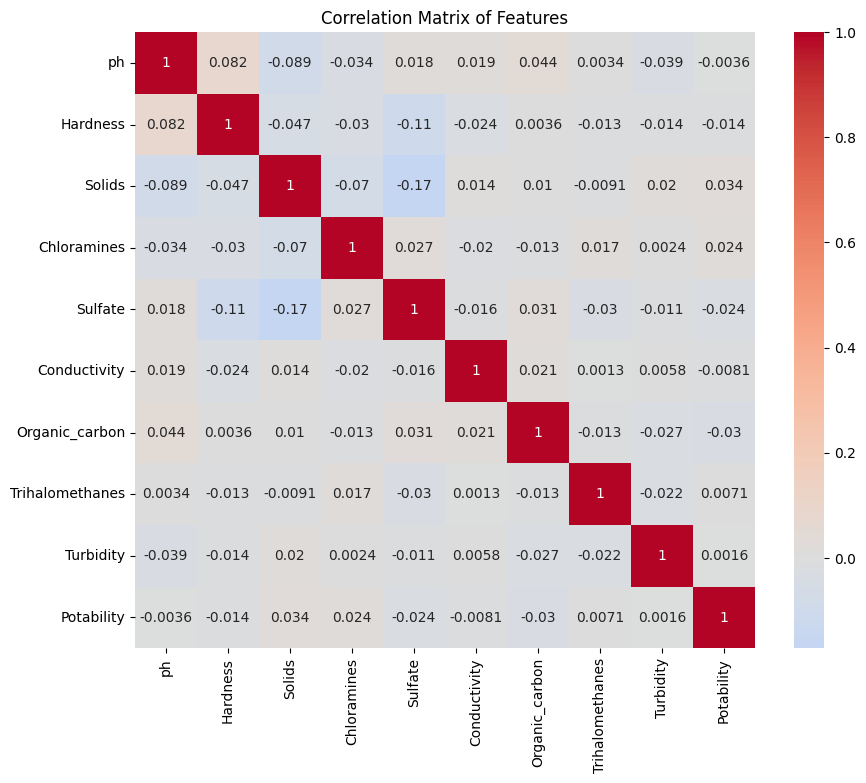

In [ ]:
# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Features')
plt.show()

# **2. Data Preprocessing**

## NULLS

In [ ]:
data.isna().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


In [ ]:
cond_null = data.isnull().any(axis=1)
cond_not_null = ~cond_null

data.loc[cond_null, 'ph'] = data.loc[cond_null, 'ph'].fillna(data.groupby('Potability')['ph'].transform('mean'))
data.loc[cond_null, 'Sulfate'] = data.loc[cond_null, 'Sulfate'].fillna(data.groupby('Potability')['Sulfate'].transform('mean'))
data.loc[cond_null, 'Trihalomethanes'] = data.loc[cond_null, 'Trihalomethanes'].fillna(data.groupby('Potability')['Trihalomethanes'].transform('mean'))

In [ ]:
data.isna().sum()

,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


## Feature Scaling/Normalization

In [ ]:
# Initialize the scaler
min_max_scaler = MinMaxScaler()

# List of features to scale (excluding the target 'Potability')
features = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate',
            'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']

# Apply Min-Max scaling
data[features] = min_max_scaler.fit_transform(data[features])

# Display the scaled data
print(data.head())

         ph  Hardness    Solids  Chloramines   Sulfate  Conductivity  \
0  0.506098  0.571139  0.336096     0.543891  0.680385      0.669439   
1  0.265434  0.297400  0.300611     0.491839  0.583939      0.719411   
2  0.578509  0.641311  0.321619     0.698543  0.583939      0.414652   
3  0.594055  0.605536  0.356244     0.603314  0.647347      0.317880   
4  0.649445  0.484851  0.289922     0.484900  0.514545      0.379337   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0        0.313402         0.699753   0.286091           0  
1        0.497319         0.450999   0.576793           0  
2        0.562017         0.532866   0.303637           0  
3        0.622089         0.808065   0.601015           0  
4        0.358555         0.253606   0.496327           0  


## Encoding Categorical Variables

**we dont need to convert any object values to numercal**

## OUTLIERS

In [ ]:
outlier_percentage = {}

for col in data.columns[:-1]:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    outlier_percentage[col] = len(outliers) / len(data) * 100

print("Percentage of outliers in each column:")
for col, percentage in outlier_percentage.items():
    print(f"{col}: {percentage:.2f}%")

Percentage of outliers in each column:
ph: 4.33%
Hardness: 2.53%
Solids: 1.43%
Chloramines: 1.86%
Sulfate: 8.06%
Conductivity: 0.34%
Organic_carbon: 0.76%
Trihalomethanes: 1.65%
Turbidity: 0.58%


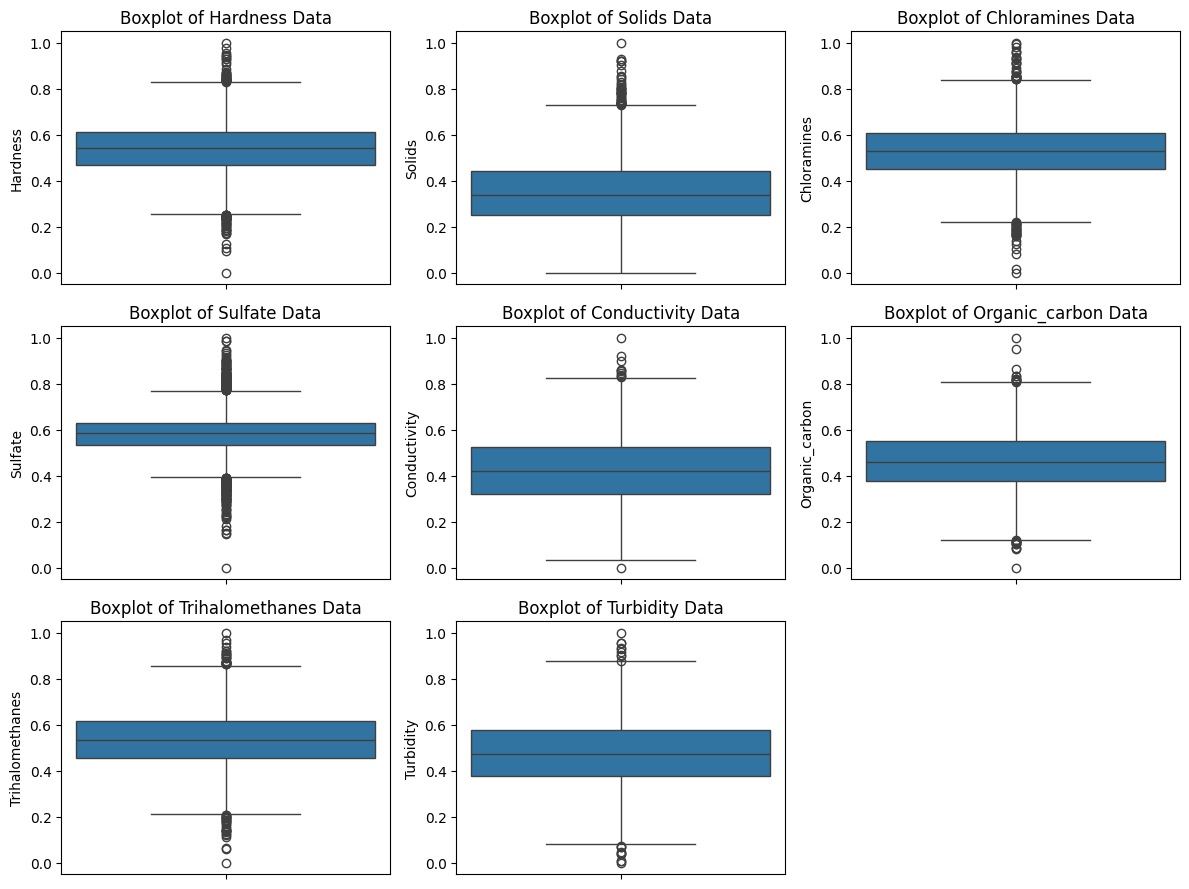

In [ ]:
plt.figure(figsize = (12, 9))
for i, col in enumerate(data.columns[1:-1], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data[col])
    plt.title(f"Boxplot of {col} Data")
    plt.tight_layout()
    plt.plot()

In [ ]:
def z_capping (df,cols,thr):
  for col in cols:
    mean =df[col].mean()
    std=df[col].std()
    upper_bound=mean+thr*std
    lower_bound=mean-thr*std
    df[col]=np.where(df[col]>upper_bound,upper_bound,np.where(df[col]<lower_bound,lower_bound,df[col]))

In [ ]:
z_capping(data,data.columns,1.5)

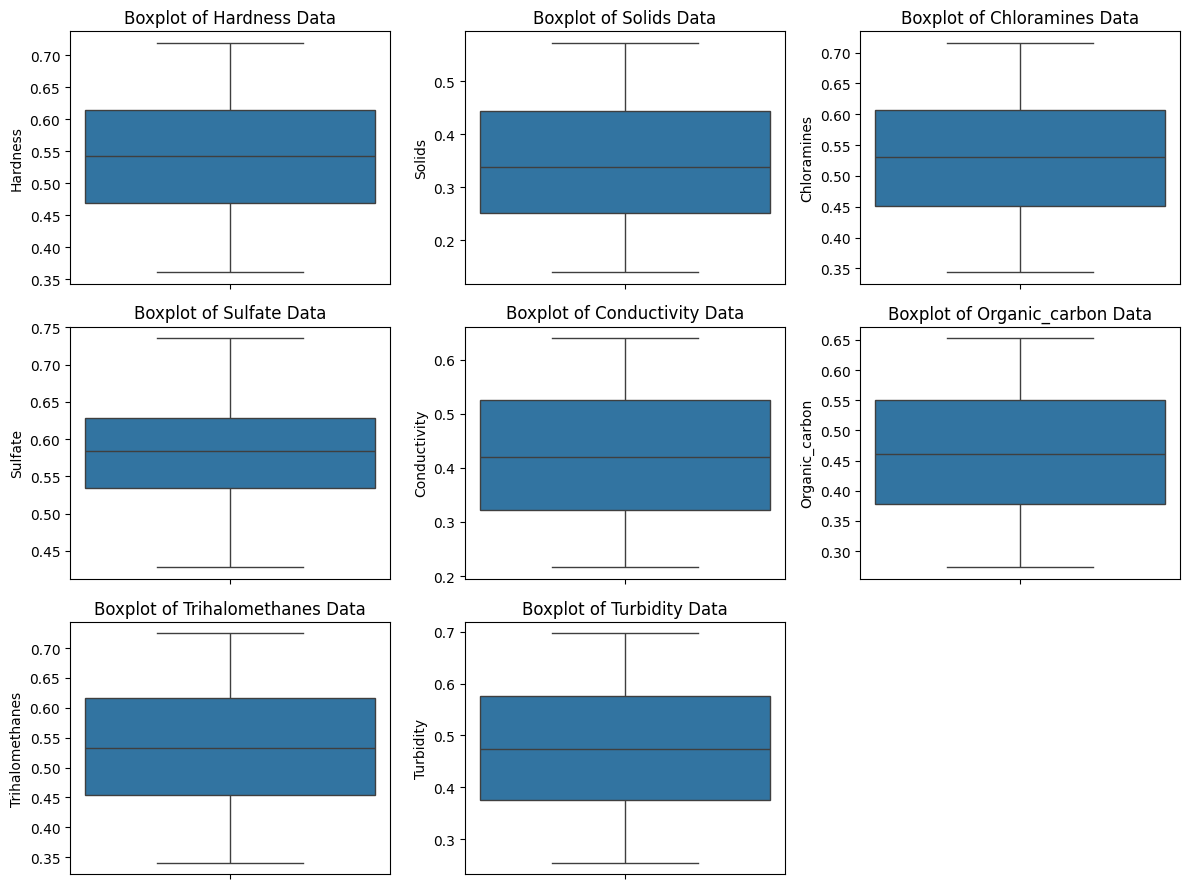

In [ ]:
plt.figure(figsize = (12, 9))
for i, col in enumerate(data.columns[1:-1], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data[col])
    plt.title(f"Boxplot of {col} Data")
    plt.tight_layout()
    plt.plot()

In [ ]:
outlier_percentage = {}

for col in data.columns[:-1]:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    outlier_percentage[col] = len(outliers) / len(data) * 100

print("Percentage of outliers in each column:")
for col, percentage in outlier_percentage.items():
    print(f"{col}:{percentage:}%")

Percentage of outliers in each column:
ph:0.0%
Hardness:0.0%
Solids:0.0%
Chloramines:0.0%
Sulfate:0.0%
Conductivity:0.0%
Organic_carbon:0.0%
Trihalomethanes:0.0%
Turbidity:0.0%


### Feature Engineering

# 3. Model Building

### Traning testing

In [ ]:
x = data.drop("Potability", axis=1)
y = data.Potability
X_train , X_test , y_train , y_test = train_test_split(x , y, test_size=0.14, random_state=42)

### GradientBoostingClassifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

best_accuracy = 0
best_hyperparameters = None

learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=4, max_depth=2, random_state=42, min_samples_leaf=90)
    gb.fit(X_train, y_train)

    # Predictions
    y_pred_train = gb.predict(X_train)
    y_pred_test = gb.predict(X_test)


    accuracy_train = gb.score(X_train, y_train)
    accuracy_test = gb.score(X_test, y_test)
    print("Accuracy score (training): {0:.3f}".format(accuracy_train))
    print("Accuracy score (validation): {0:.3f}".format(accuracy_test))

    # Compute confusion matrices
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    print("\nConfusion Matrix (Training set):")
    print(cm_train)
    print("\nConfusion Matrix (Validation set):")
    print(cm_test)

    if accuracy_test > best_accuracy:
        best_accuracy = accuracy_test
        best_hyperparameters = {
            'learning_rate': learning_rate,
            'max_features': 4,  # Adjust this if needed
            'max_depth': 2
        }


print("\nBest hyperparameters:")
print(best_hyperparameters)
print("Best accuracy on validation set: {0:.3f}".format(best_accuracy))


Accuracy score (training): 0.725
Accuracy score (validation): 0.728

Confusion Matrix (Training set):
[[1713    0]
 [ 775  329]]

Confusion Matrix (Validation set):
[[285   0]
 [125  49]]
Accuracy score (training): 0.751
Accuracy score (validation): 0.749

Confusion Matrix (Training set):
[[1699   14]
 [ 687  417]]

Confusion Matrix (Validation set):
[[284   1]
 [114  60]]
Accuracy score (training): 0.788
Accuracy score (validation): 0.765

Confusion Matrix (Training set):
[[1641   72]
 [ 526  578]]

Confusion Matrix (Validation set):
[[269  16]
 [ 92  82]]
Accuracy score (training): 0.807
Accuracy score (validation): 0.767

Confusion Matrix (Training set):
[[1586  127]
 [ 418  686]]

Confusion Matrix (Validation set):
[[256  29]
 [ 78  96]]
Accuracy score (training): 0.813
Accuracy score (validation): 0.778

Confusion Matrix (Training set):
[[1564  149]
 [ 377  727]]

Confusion Matrix (Validation set):
[[254  31]
 [ 71 103]]
Accuracy score (training): 0.814
Accuracy score (validation)

### SVM

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

# Initialize and fit the SVM model
classy = svm.SVC(kernel='rbf', C=1.0, gamma='scale')
classy.fit(X_train, y_train)

# Make predictions
pred_train = classy.predict(X_train)
pred_test = classy.predict(X_test)

# Calculate accuracy
print("Accuracy train: ", accuracy_score(y_train, pred_train))
print("Accuracy test: ", accuracy_score(y_test, pred_test))

# Compute confusion matrices
cm_train = confusion_matrix(y_train, pred_train)
cm_test = confusion_matrix(y_test, pred_test)

# Print confusion matrices
print("\nConfusion Matrix (Training set):")
print(cm_train)
print("\nConfusion Matrix (Validation set):")
print(cm_test)


Accuracy train:  0.7011004614838481
Accuracy test:  0.6797385620915033

Confusion Matrix (Training set):
[[1633   80]
 [ 762  342]]

Confusion Matrix (Validation set):
[[264  21]
 [126  48]]


### TREE

In [ ]:
decision_tree = DecisionTreeClassifier(random_state=41,max_depth=6,min_samples_split=0.03)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
print("Train accuracy:",acc_decision_tree)
print("Test Accuracy:", 100*(metrics.accuracy_score(y_test, y_pred)))
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)

Train accuracy: 79.2
Test Accuracy: 76.25272331154684
Confusion Matrix:
[[264  21]
 [ 88  86]]


### Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Initialize and fit the RandomForestClassifier with corrected parameters
rfc1 = RandomForestClassifier(n_estimators=64,
                              min_samples_split=4,
                              min_samples_leaf=50,
                              max_features='sqrt',  # Corrected from 'auto' to 'sqrt'
                              max_depth=4)

# Fitting the model
rfc1.fit(X_train, y_train)

# Predicting
pred_train = rfc1.predict(X_train)
pred_test = rfc1.predict(X_test)

# Evaluating accuracy
print("Accuracy train: ", accuracy_score(y_train, pred_train))
print("Accuracy test: ", accuracy_score(y_test, pred_test))


# Compute confusion matrices
cm_train = confusion_matrix(y_train, pred_train)
cm_test = confusion_matrix(y_test, pred_test)

# Print confusion matrices
print("\nConfusion Matrix (Training set):")
print(cm_train)
print("\nConfusion Matrix (Validation set):")
print(cm_test)

Accuracy train:  0.7930422435214768
Accuracy test:  0.7799564270152506

Confusion Matrix (Training set):
[[1667   46]
 [ 537  567]]

Confusion Matrix (Validation set):
[[276   9]
 [ 92  82]]


# **cross validation**

In [ ]:
from sklearn.model_selection import cross_val_score
# Perform cross-validation
cv_scores = cross_val_score(rfc1, X_train, y_train, cv=5)
print(f"Average 5-Fold Cross-Validation Score: {cv_scores.mean()}")

Average 5-Fold Cross-Validation Score: 0.7621581446909288


### Baseline Model Comparison

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
baseline_model = DummyClassifier(strategy="most_frequent")

baseline_model.fit(X_train, y_train)

y_pred_baseline = baseline_model.predict(X_test)

baseline_accuracy = accuracy_score(y_test, y_pred_baseline)
print(f"Baseline Model Accuracy: {baseline_accuracy:.4f}")


Baseline Model Accuracy: 0.6209


# 4. Model Evaluation

### Performance Metrics Calculation

Performance metrics are essential for assessing how well a machine learning model performs. They help in understanding the model’s strengths and weaknesses, guiding improvements and ensuring the model meets the desired objectives.

Here are some common performance metrics used in machine learning:

Classification Metrics
Accuracy: The ratio of correctly predicted instances to the total instances.
Precision: The ratio of true positive predictions to the total positive predictions.
Recall (Sensitivity): The ratio of true positive predictions to the total actual positives.
F1 Score: The harmonic mean of precision and recall, providing a balance between the two.
ROC-AUC (Receiver Operating Characteristic - Area Under Curve): Measures the ability of the model to distinguish between classes.

In [ ]:
# Assuming you have loaded your dataset into a DataFrame named df

# Split the dataset into features (X) and target (y)
X = data.drop(columns='Potability')
y = data['Potability']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for AUC-ROC

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

# Calculate AUC-ROC
auc_roc = roc_auc_score(y_test, y_prob)

# Print the results
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')
print(f'AUC-ROC: {auc_roc:.4f}')

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

Accuracy: 0.8140
Precision: 0.8315
Recall: 0.6270
F1-Score: 0.7150
AUC-ROC: 0.8741

Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.92      0.86       412
         1.0       0.83      0.63      0.71       244

    accuracy                           0.81       656
   macro avg       0.82      0.78      0.79       656
weighted avg       0.82      0.81      0.81       656


Confusion Matrix:
[[381  31]
 [ 91 153]]


In [ ]:
# Assuming you have loaded your dataset into a DataFrame named df

# Split the dataset into features (X) and target (y)
X = data.drop(columns='Potability')
y = data['Potability']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree model
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for AUC-ROC

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

# Calculate AUC-ROC
auc_roc = roc_auc_score(y_test, y_prob)

# Print the results
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')
print(f'AUC-ROC: {auc_roc:.4f}')

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)


Accuracy: 0.7485
Precision: 0.6639
Recall: 0.6557
F1-Score: 0.6598
AUC-ROC: 0.7296

Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.80      0.80       412
         1.0       0.66      0.66      0.66       244

    accuracy                           0.75       656
   macro avg       0.73      0.73      0.73       656
weighted avg       0.75      0.75      0.75       656


Confusion Matrix:
[[331  81]
 [ 84 160]]


In [ ]:
# Assuming you have loaded your dataset into a DataFrame named df

# Split the dataset into features (X) and target (y)
X = data.drop(columns='Potability')
y = data['Potability']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVM model
model = SVC(probability=True, random_state=42)  # probability=True is needed for AUC-ROC

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for AUC-ROC

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

# Calculate AUC-ROC
auc_roc = roc_auc_score(y_test, y_prob)

# Print the results
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')
print(f'AUC-ROC: {auc_roc:.4f}')

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

Accuracy: 0.6860
Precision: 0.7021
Recall: 0.2705
F1-Score: 0.3905
AUC-ROC: 0.6877

Classification Report:
              precision    recall  f1-score   support

         0.0       0.68      0.93      0.79       412
         1.0       0.70      0.27      0.39       244

    accuracy                           0.69       656
   macro avg       0.69      0.60      0.59       656
weighted avg       0.69      0.69      0.64       656


Confusion Matrix:
[[384  28]
 [178  66]]


Accuracy: 0.8034
Precision: 0.8363
Recall: 0.5861
F1-Score: 0.6892
AUC-ROC: 0.8904

Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.93      0.86       412
         1.0       0.84      0.59      0.69       244

    accuracy                           0.80       656
   macro avg       0.81      0.76      0.77       656
weighted avg       0.81      0.80      0.79       656


Confusion Matrix:
[[384  28]
 [101 143]]


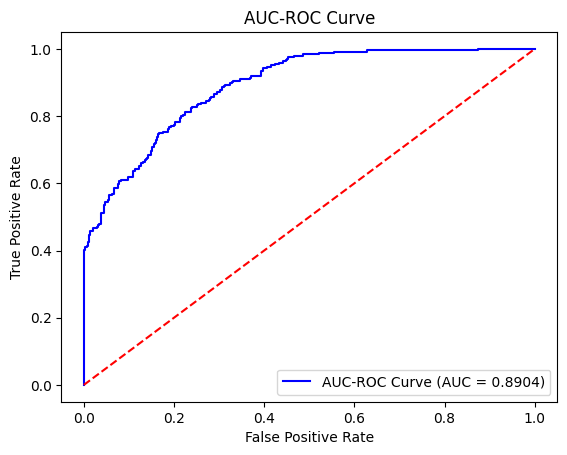

In [ ]:
# Assuming you have loaded your dataset into a DataFrame named df

# Split the dataset into features (X) and target (y)
X = data.drop(columns='Potability')
y = data['Potability']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting model
model = GradientBoostingClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for AUC-ROC

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

# Calculate AUC-ROC
auc_roc = roc_auc_score(y_test, y_prob)

# Print the results
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')
print(f'AUC-ROC: {auc_roc:.4f}')

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Plot AUC-ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, color='blue', label=f'AUC-ROC Curve (AUC = {auc_roc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve')
plt.legend()
plt.show()


### Class Imbalance Handling

We created this particular step oversampling(smote) but it negatively affected the accuracy

# 5. Model Interpretation

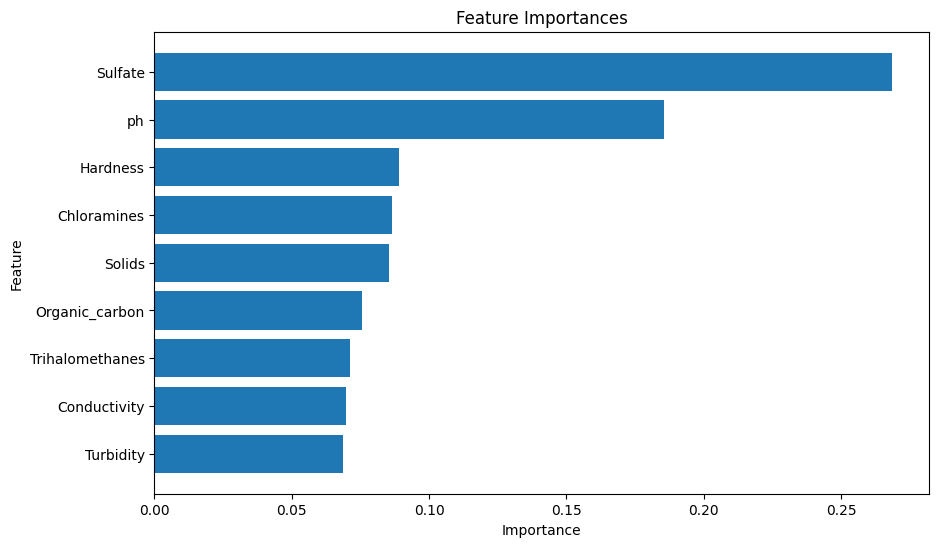

           Feature  Importance
4          Sulfate    0.268763
0               ph    0.185671
1         Hardness    0.088889
3      Chloramines    0.086349
2           Solids    0.085251
6   Organic_carbon    0.075574
7  Trihalomethanes    0.071310
5     Conductivity    0.069640
8        Turbidity    0.068553


In [ ]:
# Assuming you have loaded your dataset into a DataFrame named df

# Split the dataset into features (X) and target (y)
X = data.drop(columns='Potability')
y = data['Potability']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

# Display feature importances
print(feature_importances)


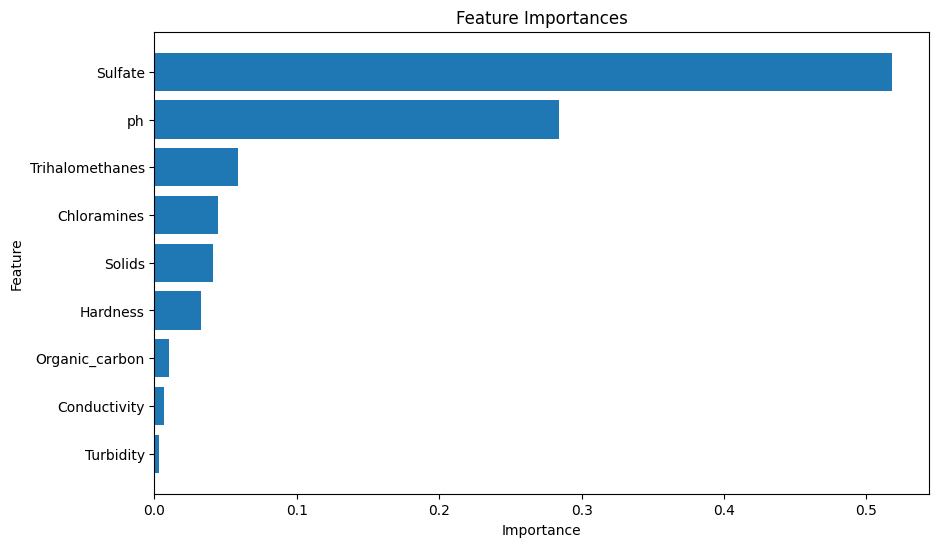

           Feature  Importance
4          Sulfate    0.518330
0               ph    0.284106
7  Trihalomethanes    0.058781
3      Chloramines    0.044664
2           Solids    0.041133
1         Hardness    0.032677
6   Organic_carbon    0.009980
5     Conductivity    0.006988
8        Turbidity    0.003341


In [ ]:
# Initialize the Gradient Boosting model
model = GradientBoostingClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

# Display feature importances
print(feature_importances)


**Using the methods described, we can evaluate and interpret the importance of features in models such as decision trees, random forests, and gradient boosting, allowing us to better understand and interpret how these models make their decisions.**

**For models like SVM, which do not inherently provide feature importance, you can use techniques**

# FINALLY TEST

In [ ]:
import joblib
import pandas as pd

# Load the pre-trained model pipeline
model_pipeline = joblib.load('model_pipeline.pkl')

# Define feature names as they were used during training
feature_names = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']

def get_user_input():
    """Function to get user input for the model features."""
    print("Enter the following values for prediction:")
    user_input = {}
    for feature in feature_names:
        while True:
            try:
                value = float(input(f"{feature}: "))
                user_input[feature] = value
                break
            except ValueError:
                print("Please enter a valid number.")
    return pd.DataFrame([user_input])

def main():
    """Main function to test the model with user input."""
    # Get user input
    input_data = get_user_input()

    # Predict using the loaded model pipeline
    prediction = model_pipeline.predict(input_data)

    # Convert prediction to human-readable form
    result = "Potable" if prediction[0] == 1 else "Not Potable"

    # Output the result
    print(f"\nPrediction: The water is {result}.")

if __name__ == "__main__":
    main()


Enter the following values for prediction:
